## Credit Card Fraud Detection

                                                                   
<h3 align='right'><font color='red'>HariKrishnan Sekar</font></h3>
In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Exploratory data analysis

In the below cells, we are to import Kaggle dataset using a combination of Colab API's and Kaggle API's


In [223]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [224]:
file_id = '******************************'
destination = 'archive.zip'
download_file_from_google_drive(file_id, destination)

In [226]:
#extract csv from zip file

import zipfile
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
#Read the CSV file
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***There is no null value in the data set. Hence we need not perform any null value operations***

In [4]:
#Sneak peak into the  data frame
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As seen from above result, the Amount column is highly skewed towards the right and needs to be handled
<br>
Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('The ratio of Fraud to non-fraud transactions is '+str(round((fraud_share/normal_share)*100,2))+' %')

The ratio of Fraud to non-fraud transactions is 0.17 %


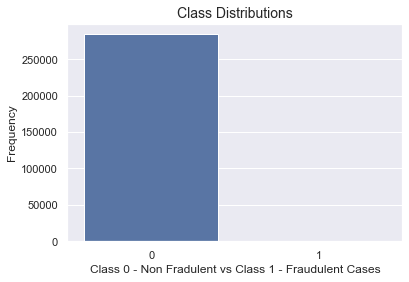

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot('Class', data=df)
plt.title('Class Distributions', fontsize=14)
plt.xlabel('Class 0 - Non Fradulent vs Class 1 - Fraudulent Cases')
plt.ylabel('Frequency')
plt.show()

As seen from above plot, the data is highly imbalanced where only 0.17% of the data accounts for fraudulent cases.
In this scenario accuracy score to evaluate our classification algorithm will not be correct.Just using accuracy as the evaluation metric will predit every case as 0 Non Fraud and hence it would be wrong.

[None, None, None, None]

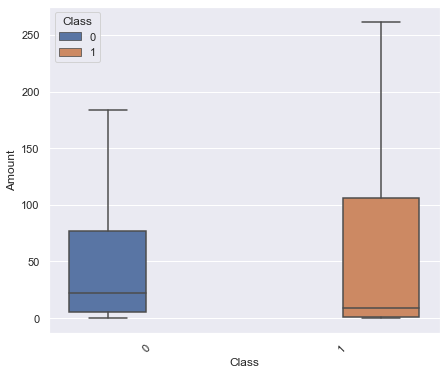

In [8]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

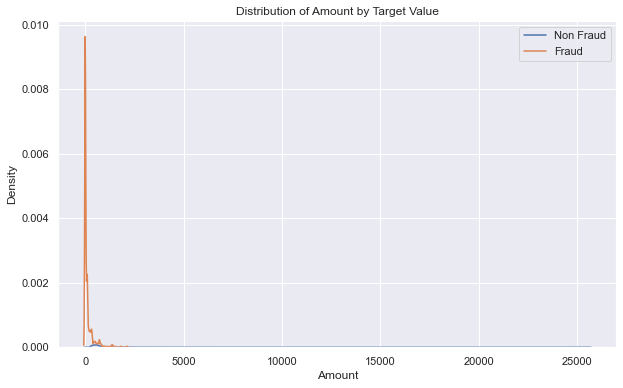

In [9]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

Inference:
The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.

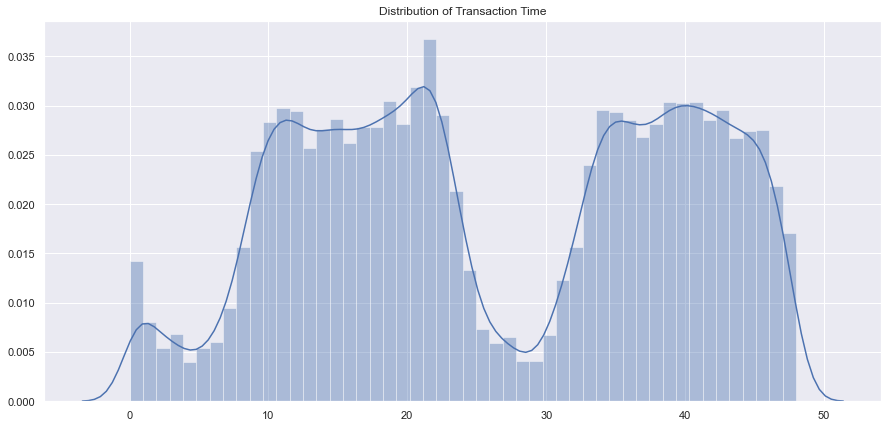

In [10]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))

In [11]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1]

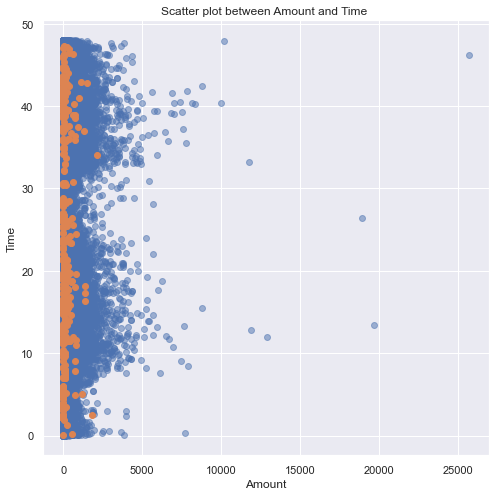

In [12]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

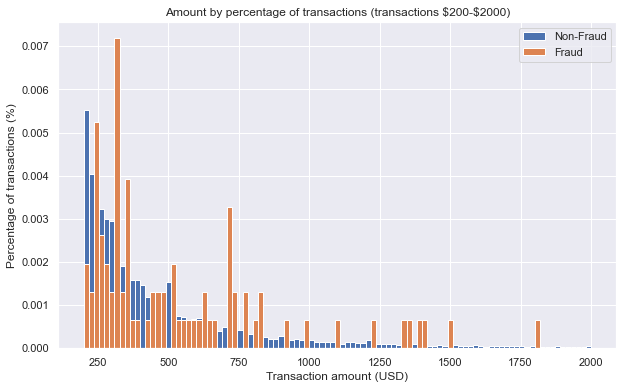

In [13]:

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Inference:

In the long tail, fraud transaction happened more frequently.The frequency is more between $250 to $750

It is hard to differentiate fraud from normal transactions by transaction amount alone.

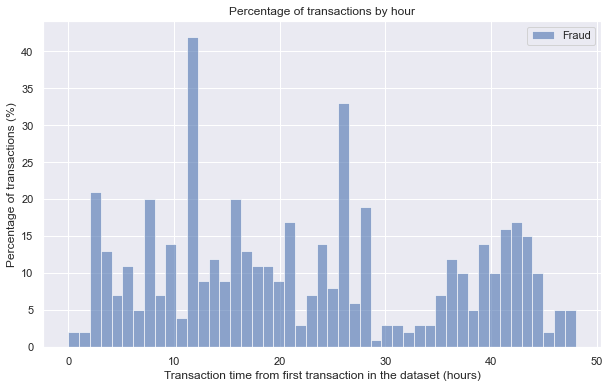

In [14]:

bins = np.linspace(0, 48, 48)
#plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1,label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6,label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Inference:
Hour zero corresponds to the hour the first transaction happened and need not to be 12-1 AM. Given the heavy decrease in normal transactions from hours 1 to 8 and again roughly at hours 24 to 32, it seems fraud tends to occur at higher rates during the night.

### Splitting the data into train & test data

In [15]:
# Putting the feature variable into X

X = df.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900


In [16]:
# Putting the Target variable to y

y = df['Class']

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
# Splitting the data into Train and Test set
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc, X.iloc
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


Text(0, 0.5, 'Count')

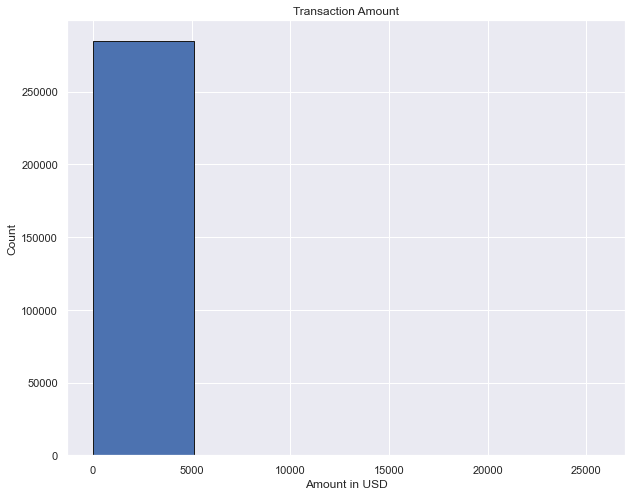

In [19]:
# Checking Skewness of data

plt.rcParams['figure.figsize'] = [10,8]
plt.hist(df['Amount'],edgecolor='k',bins = 5)
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [21]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

<h2>Building a Logistic Model</h2></br>
In this excercise instead of accuracy we are going to determine the recall score.
Increase of Recall comes at a price of Precision. 

<h2>Using Data As is - Imbalanced Data Set</h2>

<h2>Logistic Regression</h2>

<h3>Model 1 : Logistic Regression on Imbalanced Data</h3>

In [22]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
X_train=pt.fit_transform(X_train)
X_test=pt.transform(X_test)

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


In [23]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [179]:
# Predict on test data
y_predicted = model_lr.predict(X_test)

In [25]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   59    89]]
Logistic Regression Accuracy:  0.999133925541004
ROC AUC :  0.8005877455508148


In [26]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [27]:
# tpr and fpr
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

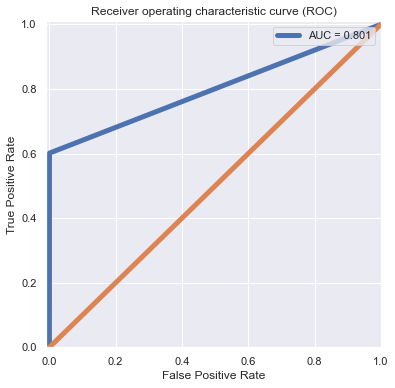

In [28]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference: </br>
Precision : 0.86 </br>
Recall : 0.60 </br>
F1-score : 0.71 </br>
Accuracy : 0.99 </br>
ROC AUC : 0.80</b>

<h3>Model 2 : Logistic Regression on Imbalanced Data with K-Fold and Hypertuning</h3>

In [30]:
from imblearn.metrics import sensitivity_specificity_support

In [31]:
# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [32]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   32.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [33]:
pd.DataFrame(model_lrh.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.1312,0.0101,0.0000,0.0000,0.1000,l1,"{'C': 0.1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,9
1,2.2695,0.1759,0.0392,0.0033,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9696,0.9926,0.9882,0.9777,0.9740,0.9804,0.0086,1
2,0.1180,0.0075,0.0000,0.0000,0.5000,l1,"{'C': 0.5, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,10
3,2.4745,0.2004,0.0348,0.0012,0.5000,l2,"{'C': 0.5, 'penalty': 'l2'}",0.9700,0.9921,0.9864,0.9776,0.9734,0.9799,0.0082,2
4,0.1110,0.0061,0.0000,0.0000,1,l1,"{'C': 1, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,11
5,2.4841,0.0896,0.0396,0.0068,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9701,0.9920,0.9861,0.9776,0.9733,0.9798,0.0081,3
6,0.1268,0.0313,0.0000,0.0000,2,l1,"{'C': 2, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,12
7,3.0772,0.4861,0.0394,0.0110,2,l2,"{'C': 2, 'penalty': 'l2'}",0.9701,0.9920,0.9860,0.9776,0.9732,0.9798,0.0081,4
8,0.1150,0.0046,0.0000,0.0000,3,l1,"{'C': 3, 'penalty': 'l1'}",nan,nan,nan,nan,nan,nan,nan,13
9,3.0252,0.4003,0.0376,0.0039,3,l2,"{'C': 3, 'penalty': 'l2'}",0.9702,0.9920,0.9859,0.9776,0.9732,0.9798,0.0081,5


In [34]:
print("Logistic Regression with PCA Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with PCA Best hyperparameters: ", model_lrh.best_params_)

Logistic Regression with PCA Best AUC :  0.9804184472371569
Logistic Regression with PCA Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [35]:
# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.1)

In [36]:
# Predicting on test data

model_lrh_tuned.fit(X_train,y_train)
y_predicted = model_lrh_tuned.predict(X_test)

In [37]:
#Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   61    87]]
Logistic Regression Accuracy:  0.9991105181231933
ROC AUC :  0.7938309887940581


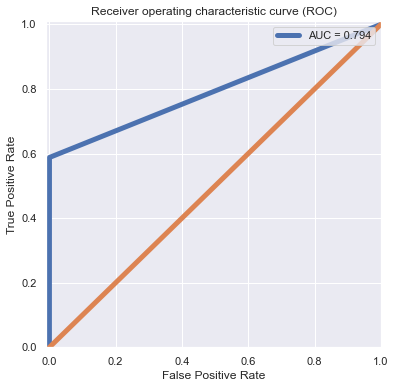

In [38]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<p><b>Inference:</br>
Precision : 0.85</br>
Recall : 0.59</br>
F1-score : 0.70</br>
Accuracy : 0.99</br>
ROC AUC : 0.79</b></p>

<h3>Model 3 : Random Forest on Imbalanced Data</h3>

In [39]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [40]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [41]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.70      0.80       148

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   44   104]]
Logistic Regression Accuracy:  0.999403110845827
ROC AUC :  0.8513103172930829


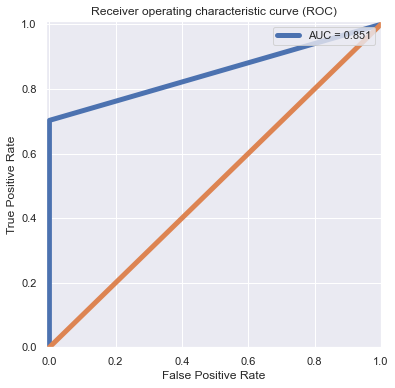

In [42]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.94
Recall : 0.70
F1-score : 0.80
Accuracy : 0.99
ROC AUC : 0.85</b>

<h3>Model 4 : Random Forest on Imbalanced Data with K-Fold and Hyperparamater Tuning</h3>

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [45]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [46]:
# Fitting the model on train data
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 393.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 574.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 400]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [59]:
# Scores of RandomizedSearchCV
scores = clf_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,139.8357,5.6139,1.6658,0.0371,200,auto,4,gini,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}",0.9608,0.9531,0.9655,0.9598,0.0051,50
1,223.4001,10.1751,3.2195,0.1069,400,log2,4,gini,"{'n_estimators': 400, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}",0.9665,0.9538,0.9682,0.9628,0.0064,45
2,254.6986,9.8012,1.8681,0.1471,200,auto,5,entropy,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}",0.9841,0.9752,0.9845,0.9813,0.0043,15
3,592.9366,19.1577,3.6792,0.1187,400,sqrt,6,entropy,"{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}",0.9842,0.9776,0.9848,0.9822,0.0032,13
4,372.6586,4.7382,3.4385,0.0153,400,auto,6,gini,"{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}",0.9763,0.9652,0.9755,0.9723,0.0051,36


In [48]:
print(clf_random.best_score_)
print(clf_random.best_params_)
print(clf_random.best_index_)

0.9841504980046776
{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}
48


0.9841504980046776
{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}
48

In [51]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=7,
                               max_features='auto',
                               min_samples_leaf=10,
                               n_estimators=400,
                               n_jobs=-1, 
                               random_state=5)

In [52]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted = model_rfc_tuned.predict(X_test)

In [53]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.72      0.76       148

    accuracy                           1.00     85443
   macro avg       0.90      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85269    26]
 [   41   107]]
Logistic Regression Accuracy:  0.9992158515033414
ROC AUC :  0.8613340742700611


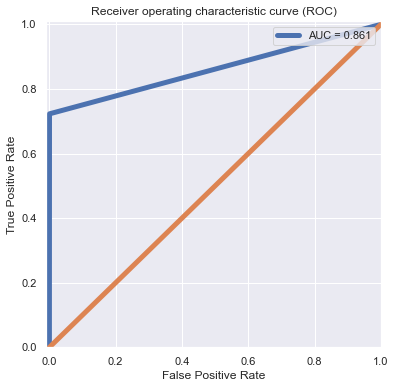

In [54]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.80
Recall : 0.72
F1-score : 0.76
Accuracy : 0.99
ROC AUC : 0.86</b>

<h3>Model 5 : XG Boost on Imbalanced Data</h3>

In [55]:
#Initializing Random forest and creating model
model_xgb = XGBClassifier()

In [56]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)
y_predicted = model_xgb.predict(X_test)

In [57]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     6]
 [   38   110]]
Logistic Regression Accuracy:  0.9994850368081645
ROC AUC :  0.8715864495716773


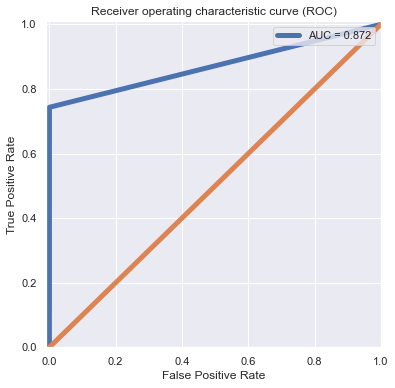

In [58]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.95
Recall : 0.74
F1-score : 0.83
Accuracy : 0.99
ROC AUC : 0.87</b>

<h3>Model 6 : XGB on Imbalanced Data with K-Fold and Hyperparamater Tuning</h3>

In [60]:
# Defining parameters
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [61]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, y_train)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [62]:
# Fitting the model on train data
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 81.7min finished


[16:06:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsampl

In [65]:
# scores of RandomizedSearchCV
scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,104.9122,8.1958,0.2310,0.0334,0.8000,10,4,1.5000,0.6000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.9261,0.9412,0.9487,0.9340,0.9178,0.9336,0.0109,15
1,120.4769,13.6534,0.2180,0.0118,1.0000,1,3,2,0.8000,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.9270,0.9417,0.9490,0.9343,0.9186,0.9341,0.0107,7
2,136.2064,9.5070,0.2028,0.0121,0.8000,10,3,5,1.0000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}",0.9199,0.9417,0.9490,0.9345,0.9114,0.9313,0.0138,24
3,75.6563,8.5317,0.1894,0.0189,0.6000,10,3,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.9257,0.9415,0.9487,0.9413,0.9175,0.9349,0.0115,3
4,85.9733,7.6852,0.1944,0.0096,0.6000,10,4,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}",0.9257,0.9410,0.9485,0.9413,0.9175,0.9348,0.0114,4


In [66]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9354436370568727
{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1.5, 'colsample_bytree': 0.8}
19


0.9354436370568727
{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1.5, 'colsample_bytree': 0.8}
19

In [67]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.8,
        max_depth= 3)

In [68]:
# Fitting the model on Train data and Predicting on Test data
model_xgb_tuned.fit(X_train,y_train)
y_predicted = model_xgb_tuned.predict(X_test)

In [69]:
# Evaluation metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   44   104]]
Logistic Regression Accuracy:  0.9994265182636377
ROC AUC :  0.8513220413097311


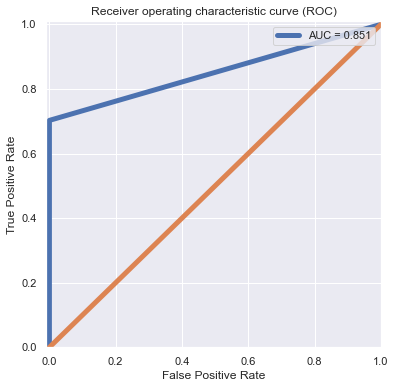

In [70]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.95
Recall : 0.70
F1-score : 0.81
Accuracy : 0.99
ROC AUC : 0.85</b>

<h2>Balanced Data Set<h2>

In [63]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Resample training data
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_sample(X_train,y_train)

<h3>Model 7 : Logistic Regression on ROS Balanced Data </h3>

In [71]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [72]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83291  2004]
 [   14   134]]
Logistic Regression Accuracy:  0.9763819154289994
ROC AUC :  0.9409552380213028


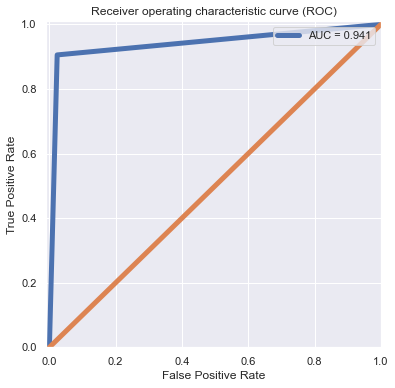

In [73]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.06
Recall : 0.91
F1-score : 0.12
Accuracy : 0.97
ROC AUC : 0.94</b>

<h3>Model 8 : Logistic Regression on SMOTE Balanced Data</h3>

In [74]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [75]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.91      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83076  2219]
 [   14   134]]
Logistic Regression Accuracy:  0.9738656180143488
ROC AUC :  0.9396949062316317


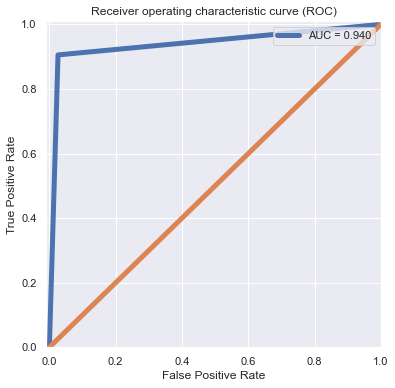

In [76]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.06
Recall : 0.91
F1-score : 0.11
Accuracy : 0.97
ROC AUC : 0.93</b>

<h3>Model 9 : Logistic Regression on ADASYN Balanced Data</h3>

In [77]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [78]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.95     85443

Confusion matrix:
 [[78046  7249]
 [   13   135]]
Logistic Regression Accuracy:  0.915007665929333
ROC AUC :  0.9135873827400295


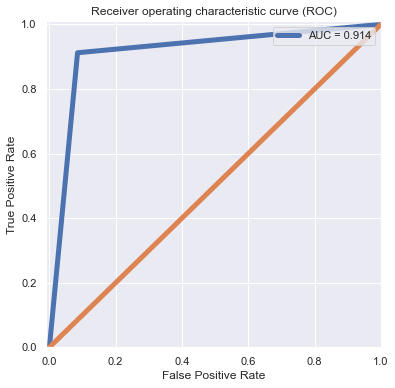

In [79]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.02
Recall : 0.91
F1-score : 0.04
Accuracy : 0.91
ROC AUC : 0.91</b>

<h3>Model 10 : Random Forest on ROS Balanced Data</h3>

In [80]:
# Insantiate Model
model_rfc = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

In [81]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc.predict(X_test)

In [82]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.45      0.76      0.57       148

    accuracy                           1.00     85443
   macro avg       0.73      0.88      0.78     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85158   137]
 [   35   113]]
Logistic Regression Accuracy:  0.9979869620682794
ROC AUC :  0.8809536616163617


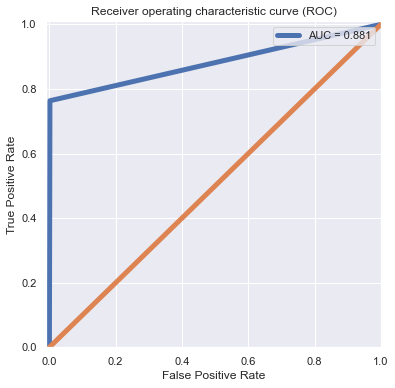

In [83]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.45
Recall : 0.76
F1-score : 0.57
Accuracy : 0.99
ROC AUC : 0.88</b>

<h3>Model 11 : Random Forest on SMOTE Balanced Data</h3>

In [84]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_smote,y_train_smote)
y_predicted = model_rfc.predict(X_test)

In [85]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.84      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83462  1833]
 [   23   125]]
Logistic Regression Accuracy:  0.9782779162716665
ROC AUC :  0.9115522360393103


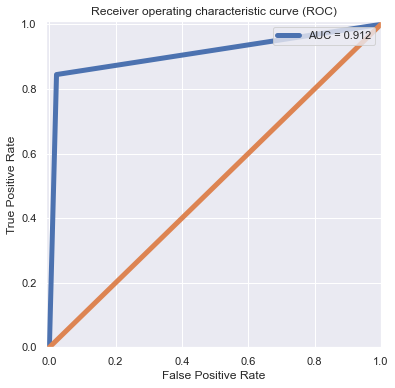

In [86]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.06
Recall : 0.84
F1-score : 0.12
Accuracy : 0.97
ROC AUC : 0.91</b>

<h3>Model 12 : Random Forest on ADASYN Balanced Data</h3>

In [87]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

In [88]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.84      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.98     85443

Confusion matrix:
 [[81463  3832]
 [   24   124]]
Logistic Regression Accuracy:  0.9548704984609623
ROC AUC :  0.8964557030211523


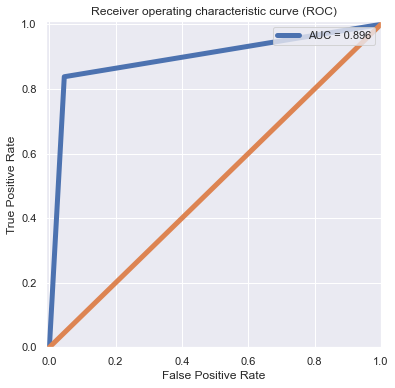

In [89]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference:
Precision : 0.03
Recall : 0.84
F1-score : 0.06
Accuracy : 0.95
ROC AUC : 0.89</b>


Let's do a Hyperparameter tuning on ROS data as it gave a better Recall and Precision

<h3>Model 13 : Hyper Tuning model Random Forest on ROS Balanced Data</h3>

In [90]:
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [91]:
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train_ros, y_train_ros)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [92]:
clf_random.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 325.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 400]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [93]:
# Scores of RandomizedSearchCV
scores = clf_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,225.1915,6.5137,4.3152,0.2336,200,auto,4,gini,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}",0.9916,0.9925,0.9914,0.9919,0.0005,46
1,362.0804,11.7128,8.0915,0.5256,400,log2,4,gini,"{'n_estimators': 400, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}",0.9917,0.9920,0.9915,0.9917,0.0002,48
2,364.9199,25.3789,4.5049,0.3636,200,auto,5,entropy,"{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}",0.9977,0.9977,0.9976,0.9976,0.0000,29
3,838.7046,15.5717,9.9716,1.0186,400,sqrt,6,entropy,"{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}",0.9991,0.9991,0.9991,0.9991,0.0000,20
4,609.8052,34.2553,9.0882,0.4120,400,auto,6,gini,"{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}",0.9981,0.9982,0.9980,0.9981,0.0001,25


In [94]:
print(clf_random.best_score_)
print(clf_random.best_params_)
print(clf_random.best_index_)

0.9999606524638803
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}
5


0.9999606524638803
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}
5

In [95]:
# Insanitiate Model on best params
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=8, 
                               max_features='auto',
                               n_estimators=200,
                               n_jobs=-1)

In [96]:
#Fit the model on train data and predict the model on test data
model_rfc_tuned.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc_tuned.predict(X_test)

In [97]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.24      0.80      0.37       148

    accuracy                           1.00     85443
   macro avg       0.62      0.90      0.69     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[84928   367]
 [   30   118]]
Logistic Regression Accuracy:  0.9953536275645752
ROC AUC :  0.8964972915937217


<b>Inference:
Precision : 0.24
Recall : 0.80
F1-score : 0.37
Accuracy : 0.99
ROC AUC : 0.89</b>

<h3>Model 14 : XGB on ROS Balanced Data</h3>

In [98]:
model_xgb_ros = XGBClassifier()

In [99]:
#Fit the model on train data and predict the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_ros.predict(X_test)

In [100]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.76      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    12]
 [   35   113]]
Logistic Regression Accuracy:  0.9994499256814484
ROC AUC :  0.8816864126568682


<b>Inference:
Precision : 0.90
Recall : 0.76
F1-score : 0.83
Accuracy : 0.99
ROC AUC : 0.88</b>

<h3>Model 15 : XGB on SMOTE Balanced Data</h3>

In [101]:
model_xgb_smote = XGBClassifier()

In [102]:
#Fit the model on train data and predict the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_smote.predict(X_test)

In [103]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85270    25]
 [   35   113]]
Logistic Regression Accuracy:  0.9992977774656788
ROC AUC :  0.8816102065486555


<b>Inference:
Precision : 0.82
Recall : 0.76
F1-score : 0.79
Accuracy : 0.99
ROC AUC : 0.88</b>

<h3>Model 16 : XGB on ADASYN Balanced Data</h3>

In [104]:
model_xgb_adasyn = XGBClassifier()

In [105]:
#Fit the model on train data and predict the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_adasyn.predict(X_test)

In [106]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85259    36]
 [   36   112]]
Logistic Regression Accuracy:  0.9991573329588147
ROC AUC :  0.8781673460787126


<b>Inference:
Precision : 0.76
Recall : 0.76
F1-score : 0.76
Accuracy : 0.99
ROC AUC : 0.87</b>

<h3>Model 17 : Hyper Tuning XGB on ROS Balanced Data</h3>

In [107]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [108]:
cross_val = StratifiedKFold(n_splits=4)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [109]:
xgb_random.fit(X_train_ros, y_train_ros)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 108.9min finished


[02:10:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsampl

In [110]:
# scores of RandomizedSearchCV
scores = xgb_random.cv_results_                                                
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,190.2804,37.3181,0.9026,0.2546,0.8000,10,4,1.5000,0.6000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.9991,0.9991,0.9990,0.9990,0.9990,0.0000,11
1,196.9883,36.3517,0.7360,0.1773,1.0000,1,3,2,0.8000,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.9957,0.9960,0.9957,0.9962,0.9959,0.0002,26
2,214.4905,29.1117,0.6095,0.0750,0.8000,10,3,5,1.0000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}",0.9952,0.9956,0.9958,0.9957,0.9956,0.0002,29
3,122.4155,9.1671,0.6318,0.0478,0.6000,10,3,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.9963,0.9968,0.9964,0.9965,0.9965,0.0002,23
4,165.0699,16.8156,0.7685,0.0697,0.6000,10,4,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}",0.9991,0.9991,0.9990,0.9991,0.9991,0.0000,9


In [111]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9998131468757255
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5


0.9998131468757255
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5

In [112]:
model_xgb_tuned_ros = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [113]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_tuned_ros.predict(X_test)

In [114]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    12]
 [   33   115]]
Logistic Regression Accuracy:  0.9994733330992591
ROC AUC :  0.8884431694136249


<b>Inference:
Precision : 0.91
Recall : 0.78
F1-score : 0.84
Accuracy : 0.99
ROC AUC : 0.88</b>

<h3>Model 18 : Hyper Tuning XGB on SMOTE Balanced Data</h3>

In [115]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [116]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_smote, y_train_smote)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =40 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [117]:
xgb_random.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 186.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 245.6min finished


[06:24:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_method=None,
                                           validate_

In [118]:
# scores of RandomizedSearchCV
scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,380.4180,30.0873,1.1477,0.2332,0.6000,1,7,1.5000,0.6000,"{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.9997,0.9997,0.9997,0.9998,0.9997,0.9997,0.0000,2
1,278.6287,41.5142,0.6124,0.1562,1.0000,5,3,5,0.8000,"{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 0.8}",0.9919,0.9920,0.9922,0.9925,0.9916,0.9920,0.0003,28
2,266.7053,53.9317,0.4838,0.0426,1.0000,10,3,2,0.8000,"{'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.9919,0.9921,0.9922,0.9926,0.9916,0.9921,0.0003,27
3,210.8679,34.8373,0.5074,0.0478,1.0000,5,3,1,0.6000,"{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.9925,0.9925,0.9928,0.9930,0.9921,0.9926,0.0003,26
4,388.3924,39.3795,0.6754,0.0410,0.8000,5,5,5,0.8000,"{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.8}",0.9982,0.9981,0.9984,0.9984,0.9981,0.9982,0.0001,18


In [119]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9997121847585781
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 0.5, 'colsample_bytree': 0.6}
36


0.9997121847585781
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 0.5, 'colsample_bytree': 0.6}
36

In [120]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 1,
        gamma= 0.5,
        subsample= 0.8,
        colsample_bytree= 0.6,
        max_depth= 7)

In [121]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_tuned.predict(X_test)

In [122]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     5]
 [   44   104]]
Logistic Regression Accuracy:  0.9994265182636377
ROC AUC :  0.8513220413097311


<b>Inference:
Precision : 0.95
Recall : 0.70
F1-score : 0.81
Accuracy : 0.99
ROC AUC : 0.85</b>

<h3>Model 19: Hyperparameter Tuning on Adasyn Balanced data</h3>

In [123]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [124]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_adasyn, y_train_adasyn)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [125]:
xgb_random.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 176.6min finished


[11:29:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsampl

In [126]:
# scores of RandomizedSearchCV
scores = xgb_random.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,226.2007,19.0909,0.5714,0.0186,0.8000,10,4,1.5000,0.6000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}",0.9594,0.9896,0.9737,0.9917,0.9760,0.9781,0.0118,14
1,239.5233,13.3223,0.5408,0.0775,1.0000,1,3,2,0.8000,"{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}",0.9476,0.9811,0.9584,0.9840,0.9598,0.9662,0.0141,26
2,264.4751,25.8337,0.4912,0.0430,0.8000,10,3,5,1.0000,"{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}",0.9452,0.9800,0.9568,0.9801,0.9582,0.9641,0.0138,28
3,156.9048,13.7927,0.5266,0.0338,0.6000,10,3,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}",0.9470,0.9838,0.9614,0.9858,0.9627,0.9681,0.0147,22
4,197.3499,16.6910,0.8068,0.2809,0.6000,10,4,1,0.6000,"{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}",0.9587,0.9903,0.9728,0.9915,0.9769,0.9781,0.0121,16


In [127]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9851735074573943
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5


0.9851735074573943
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5

In [128]:
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [129]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_tuned_adasyn.predict(X_test)

In [130]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.61      0.76      0.67       148

    accuracy                           1.00     85443
   macro avg       0.80      0.88      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85223    72]
 [   36   112]]
Logistic Regression Accuracy:  0.998735999438222
ROC AUC :  0.8779563137790466


<b>Inference:
Precision : 0.61
Recall : 0.76
F1-score : 0.67
Accuracy : 0.99
ROC AUC : 0.87</b>

<h3>Model 20: SVM on Imbalanced data</h3>

In [137]:
model_svc = SVC()

In [138]:
#Fit the model on train data and predict the model on test data
model_svc.fit(X_train,y_train)
y_predicted = model_svc.predict(X_test)

In [139]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.63      0.75       148

    accuracy                           1.00     85443
   macro avg       0.97      0.81      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     6]
 [   55    93]]
Logistic Regression Accuracy:  0.9992860737567735
ROC AUC :  0.814154017139245


<b>Inference: Precision : 0.94 Recall : 0.63 F1-score : 0.75 Accuracy : 0.99 ROC AUC : 0.81</b>

<h3>Model 21: Hyper Parameter tuning in SVM on Imbalanced data</h3>

In [133]:
#Initializing svm and creating model

from sklearn.svm import SVC
svm_model = SVC()
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [134]:
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 118.0min
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 311.1min finished


In [135]:
# scores of SVM model
scores = svm_cv_model.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,254.8201,16.5115,0.5202,0.0929,1,linear,"{'C': 1, 'kernel': 'linear'}",0.9993,0.9995,0.9994,0.9995,0.9995,0.9994,0.9994,0.9994,0.0001,1
1,244.3744,103.2540,8.2126,1.4575,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9994,0.9995,0.9995,0.9995,0.9994,0.9993,0.9993,0.9994,0.0001,17
2,500.4395,68.2502,0.4479,0.0520,2,linear,"{'C': 2, 'kernel': 'linear'}",0.9993,0.9995,0.9994,0.9995,0.9995,0.9994,0.9994,0.9994,0.0001,1
3,206.1022,30.2042,9.3555,3.4788,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.9994,0.9995,0.9995,0.9995,0.9994,0.9993,0.9992,0.9994,0.0001,13
4,664.7006,84.6447,0.4885,0.1207,3,linear,"{'C': 3, 'kernel': 'linear'}",0.9993,0.9995,0.9994,0.9995,0.9995,0.9994,0.9994,0.9994,0.0001,1


In [136]:
print(svm_cv_model.best_score_)
print(svm_cv_model.best_params_)
print(svm_cv_model.best_index_)

0.999428181416092
{'C': 1, 'kernel': 'linear'}
0


In [140]:
model_svm = SVC(C=1,kernel='linear')

In [141]:
# Fitting the model on Train data and Predicting on Test data

model_svm.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [144]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("SVM Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.84      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.98     85443

Confusion matrix:
 [[81463  3832]
 [   24   124]]
SVM Accuracy:  0.9548704984609623
ROC AUC :  0.8964557030211523


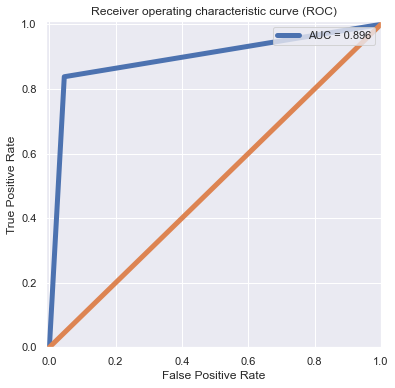

In [143]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

<b>Inference: Precision : 0.03 Recall : 0.84 F1-score : 0.06 Accuracy : 0.95 ROC AUC : 0.89</b>

<h3>Model 22: SVM on balanced data with SMOTE</h3>

In [145]:
model_svc = SVC()

In [146]:
#Fit the model on train data and predict the model on test data
model_svc.fit(X_train_smote,y_train_smote)
y_predicted = model_svc.predict(X_test)

In [148]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("SVM with SMOTE Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.84      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84330   965]
 [   23   125]]
SVM with SMOTE Accuracy:  0.9884367356015121
ROC AUC :  0.9166404592645874


<b>Inference: Precision : 0.11 Recall : 0.84 F1-score : 0.20 Accuracy : 0.98 ROC AUC : 0.91</b>

<h3>Model 23: CNN on imbalanced data</h3>

In [151]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [154]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)

In [155]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [156]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [158]:
# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              #validation_data=(X_validate_d, y_validate),
              batch_size=500, 
              epochs=epochs, 
#               class_weight=weights
             )

Epoch 1/20
399/399 [==============================] - 178s 446ms/step - loss: 0.0209 - auc_1: 0.8399
Epoch 2/20
399/399 [==============================] - 178s 447ms/step - loss: 0.0086 - auc_1: 0.8864
Epoch 3/20
399/399 [==============================] - 178s 445ms/step - loss: 0.0077 - auc_1: 0.9035
Epoch 4/20
399/399 [==============================] - 178s 445ms/step - loss: 0.0062 - auc_1: 0.9040
Epoch 5/20
399/399 [==============================] - 178s 446ms/step - loss: 0.0058 - auc_1: 0.9129
Epoch 6/20
399/399 [==============================] - 178s 447ms/step - loss: 0.0063 - auc_1: 0.9042
Epoch 7/20
399/399 [==============================] - 178s 445ms/step - loss: 0.0050 - auc_1: 0.9204
Epoch 8/20
399/399 [==============================] - 178s 445ms/step - loss: 0.0051 - auc_1: 0.9263
Epoch 9/20
399/399 [==============================] - 178s 447ms/step - loss: 0.0040 - auc_1: 0.9335
Epoch 10/20
399/399 [==============================] - 179s 448ms/step - loss: 0.0044 - auc

In [159]:
score = model.evaluate(X_test_d, y_test)

2671/2671 [==============================] - 24s 9ms/step - loss: 0.0033 - auc_1: 0.9550


In [160]:
print(score)

[0.003310193307697773, 0.9549574851989746]


In [195]:
y_predicted = model.predict(X_test_d)

In [196]:
y_predicted = np.squeeze(y_predicted.round(), axis=1)

In [199]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("CNN: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85277    18]
 [   39   109]]
CNN:  0.9993328885923949
ROC AUC :  0.8681377270934102


<b>Inference: Precision : 0.86 Recall : 0.74 F1-score : 0.79 Accuracy : 0.99 ROC AUC : 0.86</b>

<h2>Step 6: Final Analysis</h2>

<h4>Consolidated Report</h4>

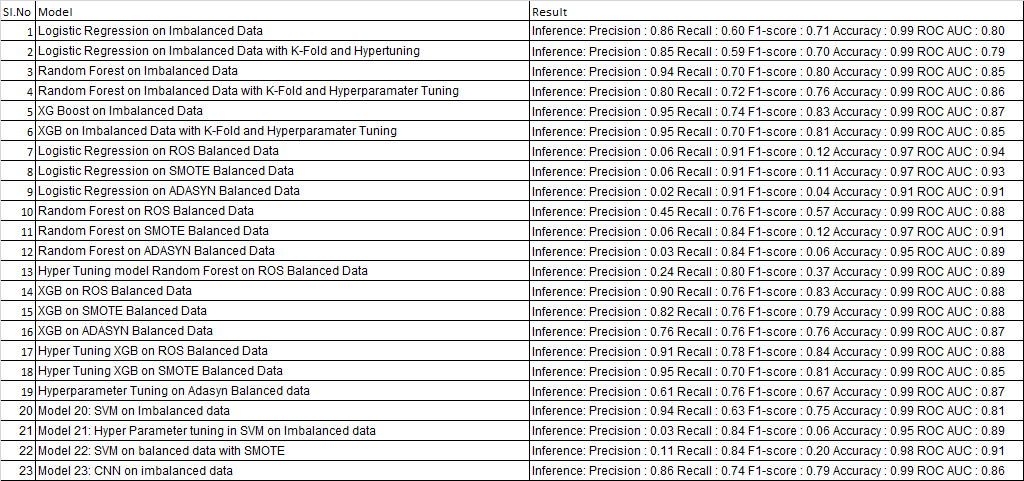

<b>Best Model considering various parameters and scenarios</b>

Since the data is highly imbalanced and in the interest of finding the correct fraud cases rather than the accuracy of the entire dataset , we are going to consider the recall, precision and ROC AUC paramenter. <b>By analyzing the above 19 models we can conclude that<font color='green'> HyperTuning the XGBoost on SMOTE Balanced Dataset</font> got the best evaluation metrices.</b>

Top var = 15
2nd Top var = 5
3rd Top var = 13


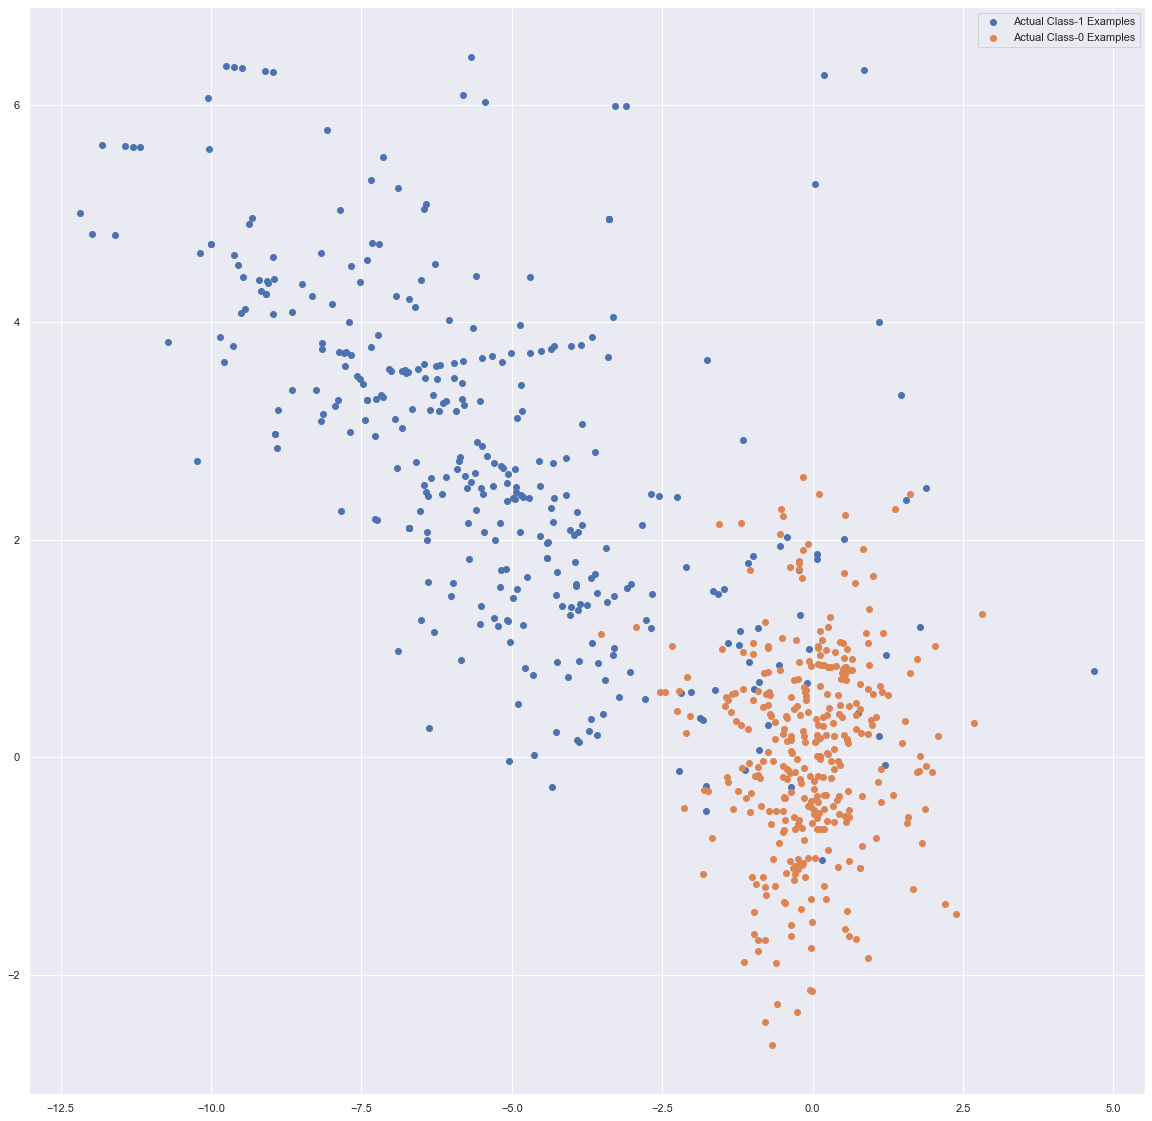

In [229]:
var_imp = []
for i in model_xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_xgb_smote.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<b>Important Features</b>

In [131]:
target = 'Class'
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

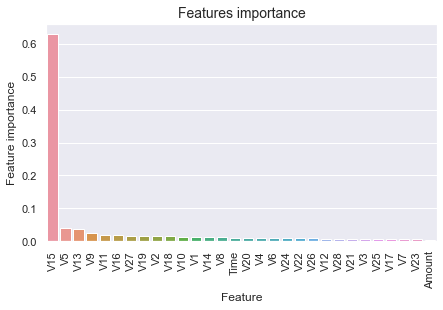

In [132]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Inference:<br>
We found out that PCA converted variables like V15, V5 , V13 can able to explain the maximum variance and hence we can target these variables to detect a fraud which matches with our model's feature aswell.

<h2>Conclusion : </h2>

We have build a logistic regression model based on the transaction data provided to us.
The data provided to us was very imbalanced data set. Hence, for building a proper logistic model on top of that we have used some balancing techniques like (ROS,SMOTE and ADASYN) to balance the data and applied some of very popular logistic regression models like Random Forest, Logistic regression and some boosting techniques like XGBoost to catch any frud transactions.
In our scenario Accuracy was not a concerning Evaluation criteria and we focussed more on Recall and AUC.
We finally able to build a proper logistic model and predicted on test data and the results were satisfying.
We were also able to figure out the variables which will be important in detecting any fraud transactions.